<a href="https://colab.research.google.com/github/Mugilvendan/sales_prediction/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales_Prediction**





In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_store = pd.read_csv("/content/stores_data_set.csv")
df_sales = pd.read_csv("/content/sales_data_set.csv",parse_dates=["Date"])
df_feature = pd.read_csv("/content/Features_data_set.csv",parse_dates=["Date"])

In [ ]:
print(df_store.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB
None


In [ ]:
print(df_store.head())

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


In [ ]:
print(df_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Dept          421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   Weekly_Sales  421570 non-null  float64       
 4   IsHoliday     421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB
None


In [ ]:
print(df_sales.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-05-02      24924.50      False
1      1     1 2010-12-02      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-05-03      21827.90      False


In [ ]:
print(df_feature.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB
None


In [ ]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
print(df_feature.columns)
print(df_sales.columns)
print(df_store.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')
Index(['Store', 'Type', 'Size'], dtype='object')


In [ ]:
# Grouping feature data in date column
data_date = df_feature.groupby("Date").agg({"Temperature": "mean","Fuel_Price": "mean","IsHoliday":"sum", "CPI": "mean", "Unemployment": "mean"})
data_date = data_date.sort_index()
temp_date_data = data_date[:'26-10-2012']

# Grouping sales data in date column
data_sales_date = df_sales.groupby("Date").agg({"Weekly_Sales": "sum"})
data_sales_date.sort_index(inplace=True)
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales/1000000
data_sales_date.Weekly_Sales = data_sales_date.Weekly_Sales.apply(int)
data = pd.merge(data_sales_date, temp_date_data, left_index=True, right_index=True, how="left")
data["IsHoliday"] = data["IsHoliday"].apply(lambda x: True if x == 45.0 else False)

In [ ]:
data.describe()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
count,143.000000,141.000000,141.000000,141.000000,141.000000
mean,46.601399,60.650640,3.351166,171.513812,8.010676
std,5.399713,15.275446,0.427819,3.073145,0.476569
min,39.000000,30.480889,2.672067,167.546485,6.953711
25%,44.000000,47.550889,2.881733,168.403673,7.508333
50%,46.000000,61.051111,3.487400,171.349416,8.150133
75%,47.000000,74.801778,3.723667,174.550920,8.428578
max,80.000000,82.176444,3.997778,176.652613,8.619311


<Axes: title={'center': 'Unemployment'}, xlabel='Date'>

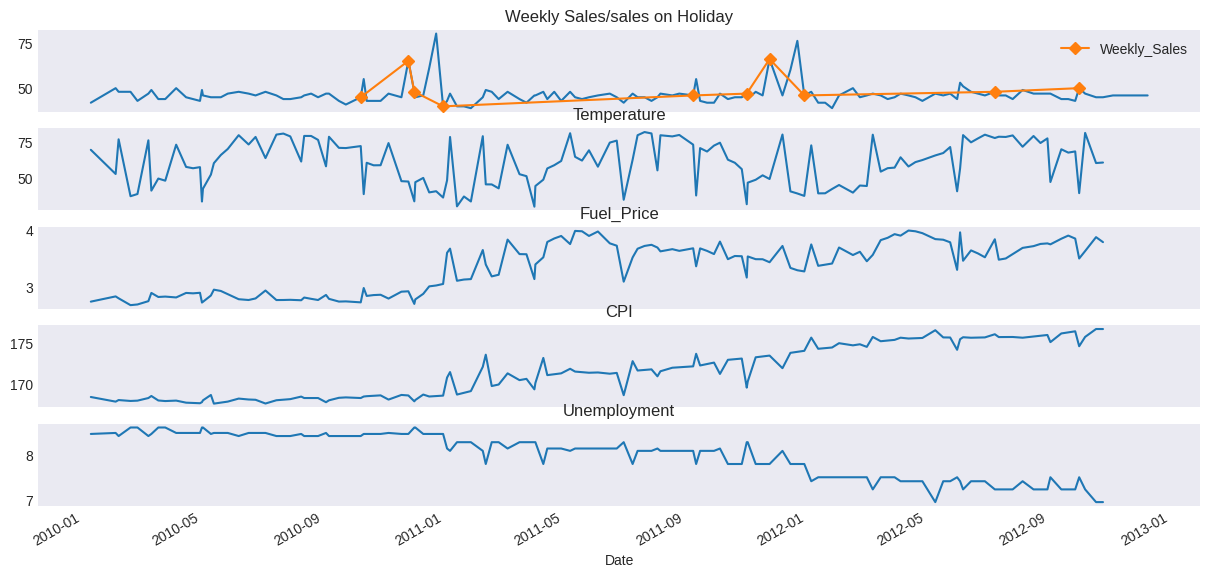

In [ ]:
plt.style.use('seaborn-dark')

fig, ax = plt.subplots(5,1,figsize=(15,7),sharex=True)
data["Weekly_Sales"].plot(ax=ax[0],title="Weekly Sales/sales on Holiday")
data[data.IsHoliday==True]["Weekly_Sales"].plot(marker="D",ax=ax[0],legend="Holiday Week sale")
data["Temperature"].plot(ax=ax[1], title="Temperature")
data["Fuel_Price"].plot(ax=ax[2],title="Fuel_Price")
data["CPI"].plot(ax=ax[3],title="CPI")
data["Unemployment"].plot(ax=ax[4],title="Unemployment")

<Axes: >

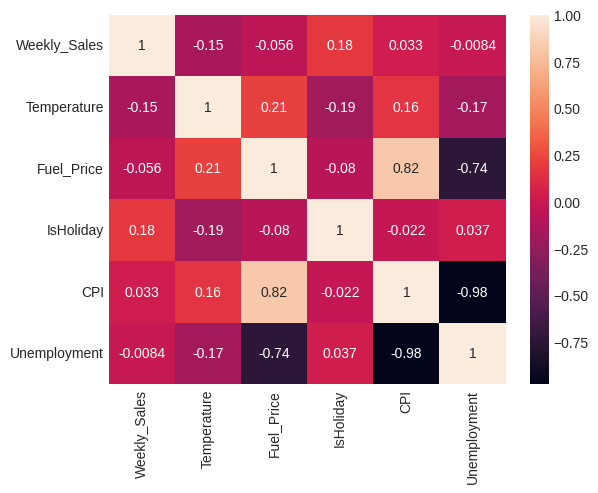

In [ ]:
sns.heatmap(data.corr(),annot=True)

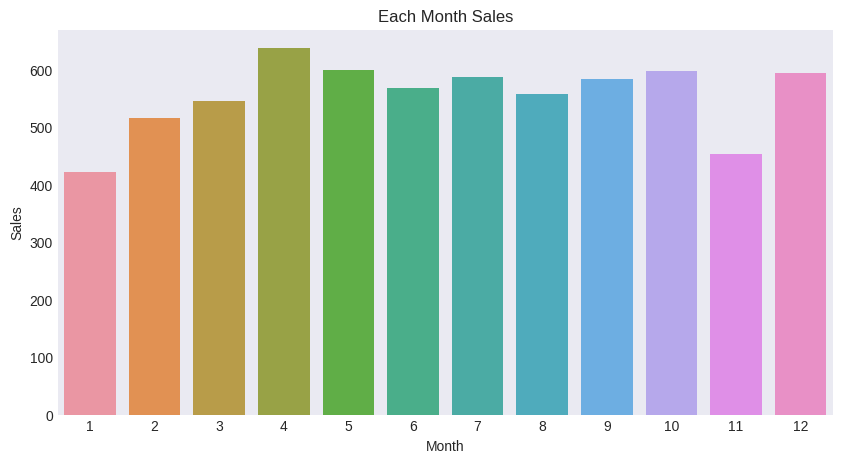

In [ ]:
data.index = pd.to_datetime(data.index)
data_sales_month = data.groupby(data.index.month).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(10,5))
sns.barplot(x = data_sales_month.index, y = data_sales_month.Weekly_Sales)
plt.title('Each Month Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

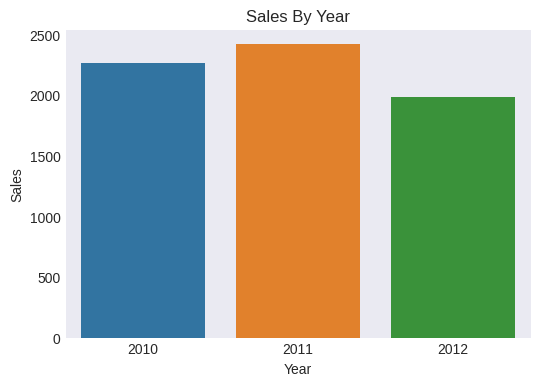

In [ ]:
data_sales_year = data.groupby(data.index.year).agg({'Weekly_Sales': 'sum'})
plt.figure(figsize=(6,4))
sns.barplot(x = data_sales_year.index, y = data_sales_year.Weekly_Sales)
plt.title('Sales By Year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

In [ ]:
import statsmodels

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data["Weekly_Sales"], period=45)

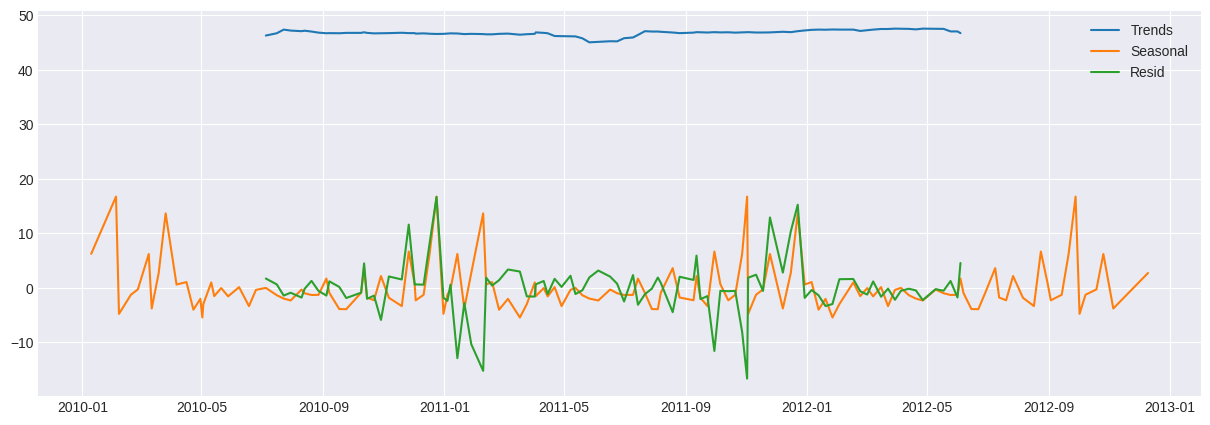

In [ ]:
plt.figure(figsize=(15,5))
plt.grid('darkgrid')
plt.plot(decomposition.trend)
plt.plot(decomposition.seasonal)
plt.plot(decomposition.resid)
plt.legend(['Trends','Seasonal', 'Resid'], loc = 'upper right')
plt.show()

In [ ]:
print(df_feature.columns)
print(df_sales.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')
Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [ ]:
data_store = df_feature.groupby('Store').agg({'Temperature': 'mean', 'Fuel_Price': 'mean', 'IsHoliday': 'sum'})

temp_store = df_sales.groupby('Store').agg({'Weekly_Sales': 'sum'})
temp_store.Weekly_Sales = temp_store.Weekly_Sales/1000000
temp_store.Weekly_Sales = temp_store.Weekly_Sales.apply(int)

data_store.set_index(np.arange(0,45), inplace=True)
df_store['Temp'] = data_store.Temperature
df_store['Fuel_Price'] = data_store.Fuel_Price
df_store['Holiday'] = data_store.IsHoliday
df_store['Week_Sales'] = temp_store.Weekly_Sales

In [ ]:
df_store.describe()

,Store,Size,Temp,Fuel_Price,Holiday,Week_Sales
count,45.000000,45.000000,45.000000,45.000000,45.0,44.000000
mean,23.000000,130287.600000,59.356198,3.405992,13.0,150.090909
std,13.133926,63825.271991,9.956122,0.153935,0.0,78.780478
min,1.000000,34875.000000,37.921264,3.245945,13.0,37.000000
25%,12.000000,70713.000000,51.866319,3.259242,13.0,78.500000
50%,23.000000,126512.000000,58.107912,3.328764,13.0,140.500000
75%,34.000000,202307.000000,68.504670,3.497874,13.0,200.750000
max,45.000000,219622.000000,75.438077,3.643654,13.0,301.000000


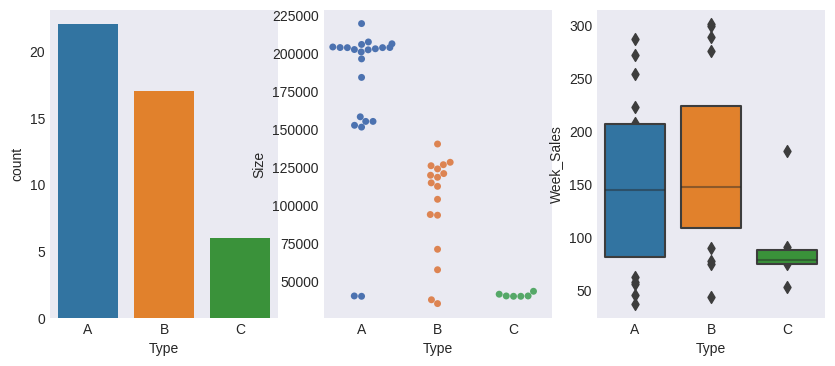

In [ ]:
fig,ax = plt.subplots(1,3,figsize=(10, 4))
count = sns.countplot(x=df_store.Type, ax=ax[0])
swarm = sns.swarmplot(data=df_store, y='Size', x='Type', ax=ax[1],  palette="deep")
box = sns.boxenplot(data=df_store, y= 'Week_Sales', x='Type', ax=ax[2])

In [ ]:
len(df_sales['Dept'].unique())

81

In [ ]:
data_dept = df_sales.groupby('Dept').agg({'Weekly_Sales': 'sum'})
data_dept.Weekly_Sales = data_dept.Weekly_Sales/10000
data_dept.Weekly_Sales = data_dept.Weekly_Sales.apply(int)
data_dept.sort_values(by='Weekly_Sales')

,Weekly_Sales
Dept,
39,0
78,0
43,0
47,0
51,3
...,...
90,29106
72,30572
38,39311


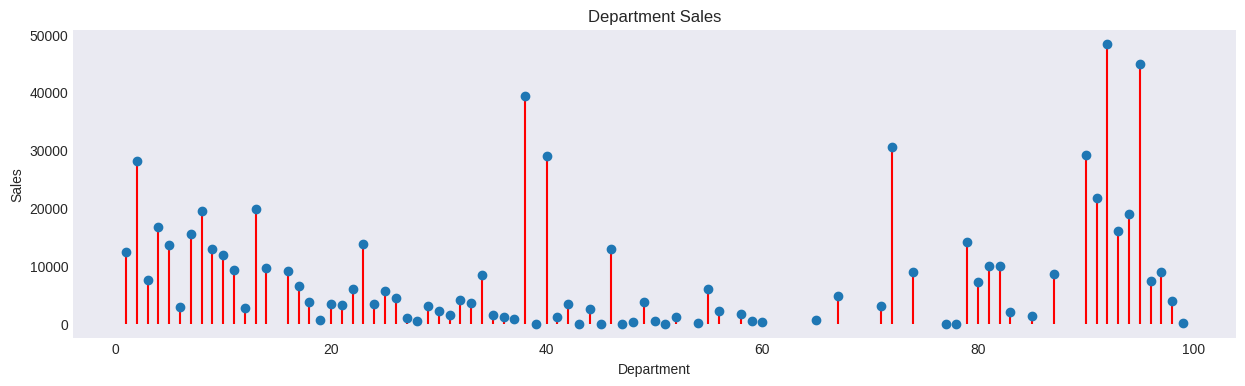

In [ ]:
fig1, ax1 = plt.subplots(figsize=(15,4))
plt.vlines(x=data_dept.index, ymin=0, ymax=data_dept['Weekly_Sales'], color='red')
plt.plot(data_dept.index, data_dept['Weekly_Sales'], 'o')
plt.title('Department Sales')
plt.xlabel('Department')
plt.ylabel('Sales')
plt.show()

In [ ]:
print(df_sales.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')


In [ ]:
sales_data_store = df_sales.groupby(['Date','Store']).agg({'Weekly_Sales': 'sum'})
sales_data_store.sort_index(inplace=True)
sales_data_store.Weekly_Sales = sales_data_store.Weekly_Sales/10000
sales_data_store.Weekly_Sales = sales_data_store.Weekly_Sales.apply(int)
data_table = pd.merge(df_feature,sales_data_store, how='left', on = ['Date','Store'])
data_table = pd.merge(data_table, df_store[['Store','Type']], how='left', on=['Store'])
data_table.head(20)
data_train = data_table[data_table.Weekly_Sales.notnull()]
data_test = data_table[data_table.Weekly_Sales.isnull()]

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(x=data_train.Date.dt.year, y=data_train.Weekly_Sales, hue=data_train.Type)
plt.show()

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

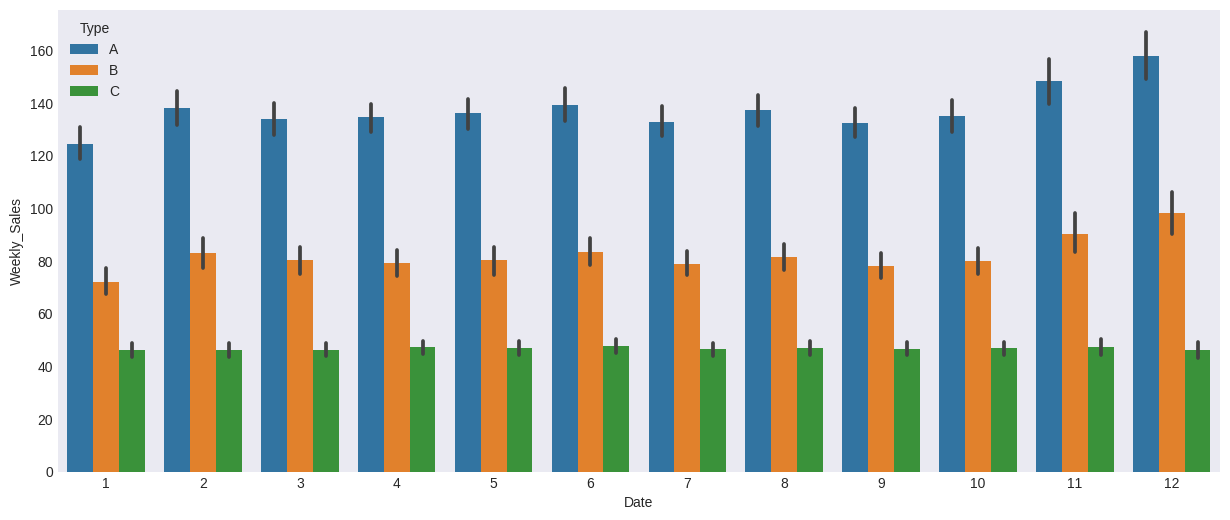

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=data_train.Date.dt.month, y= data_train.Weekly_Sales, hue=data_train.Type)

In [ ]:
data_table.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Weekly_Sales', 'Type'],
      dtype='object')

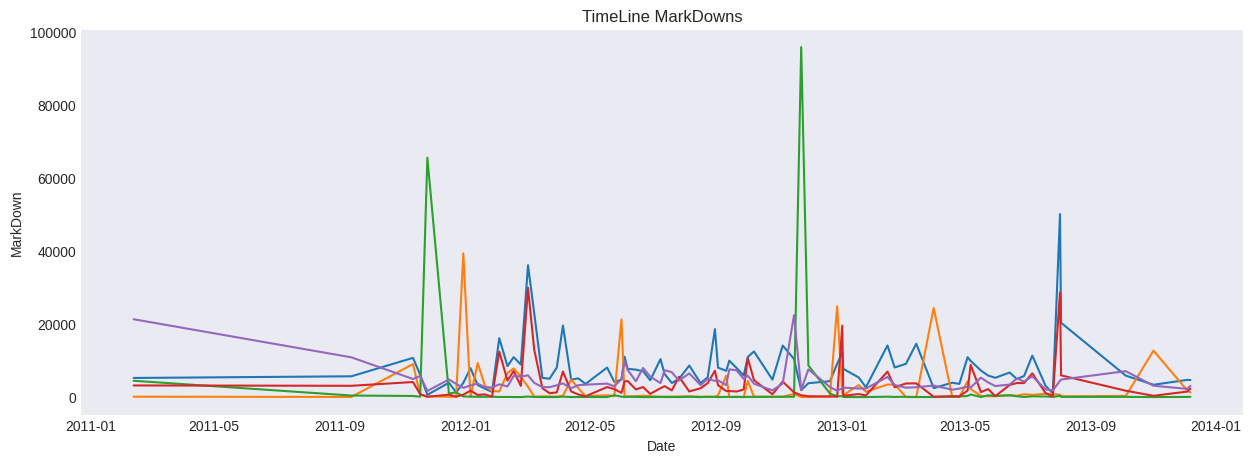

In [ ]:
plt.figure(figsize=(15,5))
train_markdown = data_table[data_table.MarkDown2.notnull()]
train_markdown = train_markdown.groupby('Date').agg({'MarkDown1': 'mean', 'MarkDown2': 'mean','MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})

plt.plot(train_markdown.index,train_markdown.MarkDown1)
plt.plot(train_markdown.index, train_markdown.MarkDown2)
plt.plot(train_markdown.index, train_markdown.MarkDown3)
plt.plot(train_markdown.index, train_markdown.MarkDown4)
plt.plot(train_markdown.index, train_markdown.MarkDown5)
plt.title('TimeLine MarkDowns')
plt.ylabel('MarkDown')
plt.xlabel('Date')
plt.show()

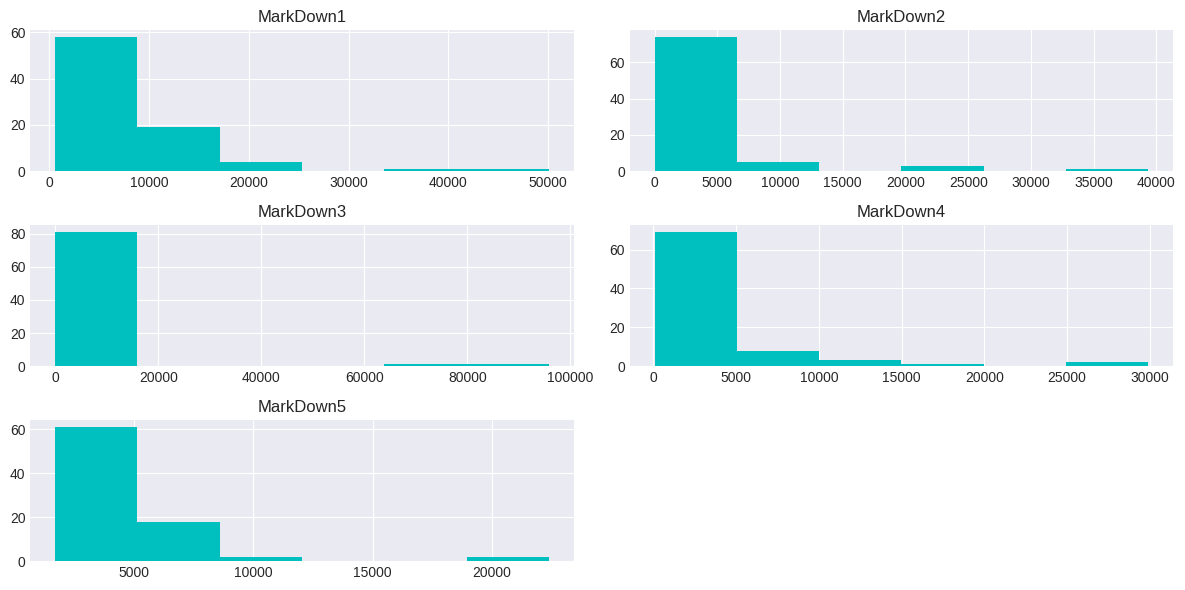

In [ ]:
train_markdown.hist(figsize=(12,6), bins=6, color='c')

plt.tight_layout()
plt.show()

Text(0, 0.5, 'MarkDown')

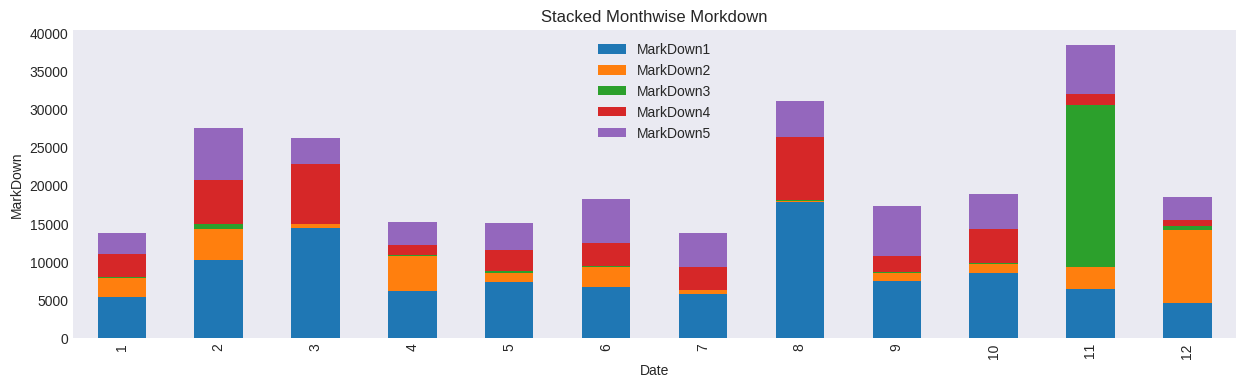

In [ ]:
train_markdown_month = train_markdown.groupby(train_markdown.index.month).agg({'MarkDown1': 'mean','MarkDown2': 'mean','MarkDown3': 'mean', 'MarkDown4': 'mean', 'MarkDown5': 'mean'})
train_markdown_month.plot(kind='bar', stacked=True, figsize=(15,4))
plt.title('Stacked Monthwise Morkdown')
plt.ylabel('MarkDown')

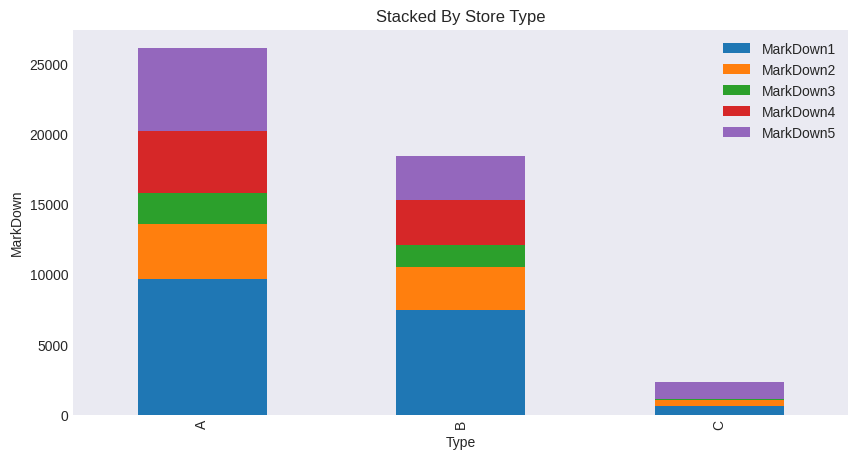

In [ ]:
train_markdown_1 = data_table[data_table.MarkDown2.notnull()]
train_markdown_type = train_markdown_1.groupby('Type').agg({'MarkDown1':'mean', 'MarkDown2':'mean', 'MarkDown3':'mean','MarkDown4':'mean', 'MarkDown5':'mean'})
train_markdown_type.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('Stacked By Store Type')
plt.ylabel('MarkDown')
plt.show()

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

In [ ]:
df_store = pd.read_csv("/content/stores_data_set.csv")
df_sales = pd.read_csv("/content/sales_data_set.csv",parse_dates=["Date"])
df_feature = pd.read_csv("/content/Features_data_set.csv",parse_dates=["Date"])

In [ ]:
df_store.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_feature.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-05-02,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-12-02,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-05-03,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-05-02,24924.50,False
1,1,1,2010-12-02,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-05-03,21827.90,False


In [ ]:
#Merge the three datasets in a unique dataframe
df= pd.merge(df_sales,df_feature, on=['Store','Date',"IsHoliday"], how='left')
df=pd.merge(df,df_store, on=['Store'], how='left')

In [ ]:
df=df.fillna(0)

In [ ]:
df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-05-02,24924.50,False,42.31,2.572,0.00,0.00,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-12-02,46039.49,True,38.51,2.548,0.00,0.00,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.00,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.00,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-05-03,21827.90,False,46.50,2.625,0.00,0.00,0.00,0.00,0.00,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-05-10,628.10,False,64.89,3.985,5046.74,0.00,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-12-10,1061.02,False,54.47,4.000,1956.28,0.00,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,0.00,3.18,437.73,1537.49,192.330854,8.667,B,118221


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.sample(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
130969,14,22,2011-01-21,17045.3,False,30.55,3.229,0.0,0.0,0.0,0.0,0.0,182.919337,8.549,A,200898


In [ ]:
import datetime

In [ ]:
df["Month"] = df["Date"].dt.month
df["Year"]  = df["Date"].dt.year
df["Week"]  = df["Date"].dt.isocalendar().week

In [ ]:
df.sample(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,Week
96249,10,83,2011-01-28,358.68,False,53.03,3.231,0.00,0.0,0.00,0.00,0.00,127.580032,8.744,B,126512,1,2011,4
269249,28,17,2012-06-22,8669.09,False,91.61,4.014,10280.97,18.4,1.12,3663.41,6659.58,130.792900,11.627,A,206302,6,2012,25


In [ ]:
df.drop(['Date'],axis=1,inplace=True)

In [ ]:
df.head(3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,Week
0,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,5,2010,17
1,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,12,2010,48
2,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2,2010,7


In [ ]:
df.isnull().sum()

Store           0
Dept            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Month           0
Year            0
Week            0
dtype: int64

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['Type']= LabelEncoder().fit_transform(df['Type'])
df['IsHoliday']= LabelEncoder().fit_transform(df['IsHoliday'])
df.sample(3)

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Month,Year,Week
280616,29,27,1755.62,0,56.32,2.776,0.0,0.0,0.00,0.00,0.00,132.751667,10.524,1,93638,8,2010,32
337359,35,59,522.94,0,45.98,2.818,0.0,0.0,0.00,0.00,0.00,135.627001,9.262,1,103681,12,2010,48
213656,22,56,6442.12,0,66.56,3.683,9564.7,193.9,9.06,3070.27,2588.53,142.129255,7.671,1,119557,6,2012,24


In [ ]:
X=df[['Store','Dept','IsHoliday','Size','Month','Year','Week','Type']]
y=df['Weekly_Sales']

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
# test and train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# decision tree
dtr = DecisionTreeRegressor()
# hyperparameters
param_grid = {
    'max_depth': [2, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2', 1, 2, 3]  # Adjust these values
}
# gridsearchcv
grid_search = GridSearchCV(estimator=dtr, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best hyperparameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
# evalution metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean squared error:', mse)
print('R-squared:', r2)

Best hyperparameters: {'max_depth': 20, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean squared error: 30218747.44521412
R-squared: 0.9420509522908442


In [ ]:
print(y_pred)

[47127.855    3765.648   10688.017   ... 13860.26875 14742.5675
 45642.39875]


In [ ]:
new_sample = np.array([[3,5, 2, 162426,2,2011,14,3]])
new_sample1 = scaler.transform(new_sample)
new_pred = best_model.predict(new_sample1)
print('Predicted selling price:',new_pred )

Predicted selling price: [22601.748]


In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)